In [1]:
## Alrighty so we're going to be comparing primary production and remineralization in this coding script
## My goal is to plot both primary production and remineralization from Year 850 on the same graph
## I also want to subtract remineralization from primary production and see how it works out
    ## Just to get the difference between the two
import xarray as xr
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib import cm


In [11]:
rootdir = '/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/'

## Remineralization 
datadir_remin = 'ocean_cobalt_omip_rates_year_z/ts/annual/5yr/'
filename_remin = 'ocean_cobalt_omip_rates_year_z.0846-0850.remoc.nc'

##Primary production

datadir_pp = 'ocean_cobalt_omip_rates_year_z/ts/annual/5yr/'
filename_pp = 'ocean_cobalt_omip_rates_year_z.0846-0850.pp.nc'

## Volume and temperature

filename_vol = 'ocean_cobalt_omip_rates_year_z.0846-0850.volcello.nc'

datadir_temp = 'ocean_annual_z/ts/annual/5yr/'
filename_temp = 'ocean_annual_z.0846-0850.thetao.nc'


In [13]:
remin = xr.open_dataset(rootdir+datadir_remin+filename_remin)

In [14]:
pp = xr.open_dataset(rootdir+datadir_pp+filename_pp)
vol = xr.open_dataset(rootdir+datadir_pp+filename_vol)
temp = xr.open_dataset(rootdir+datadir_temp+filename_temp)


In [15]:
de = xr.merge([remin, pp, vol, temp])

/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/pyt

In [17]:
remin_mol = de.remoc * de.volcello
remin_mol.name = 'remin_mol'
de = xr.merge([de, remin_mol])

pp_mol = de.pp * de.volcello
pp_mol.name = 'pp_mol'
de = xr.merge([de, pp_mol])

In [18]:
de = de.set_coords('thetao')
theta_bins = np.arange(-2,30,2)

In [21]:
de

<xarray.Dataset>
Dimensions:     (nv: 2, time: 5, xh: 720, yh: 576, z_i: 36, z_l: 35)
Coordinates:
  * nv          (nv) float64 1.0 2.0
  * time        (time) object 0846-07-02 12:00:00 ... 0850-07-02 12:00:00
  * xh          (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh          (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * z_i         (z_i) float64 0.0 5.0 15.0 25.0 ... 5.75e+03 6.25e+03 6.75e+03
  * z_l         (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
    thetao      (time, z_l, yh, xh) float32 ...
Data variables:
    average_DT  (time) timedelta64[ns] 365 days 365 days ... 365 days 365 days
    average_T1  (time) object 0845-06-04 00:00:00 ... 0849-06-03 00:00:00
    average_T2  (time) object 0846-06-04 00:00:00 ... 0850-06-03 00:00:00
    remoc       (time, z_l, yh, xh) float32 ...
    time_bnds   (time, nv) object 0846-01-01 00:00:00 ... 0851-01-01 00:00:00
    pp          (time, z_l, yh, xh) float32 ...
    vol

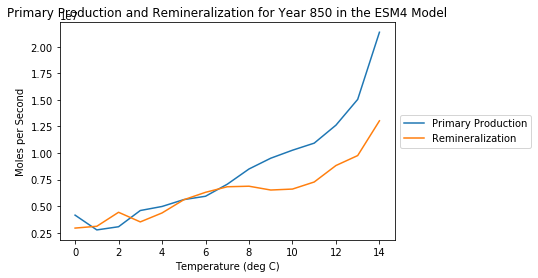

In [25]:
pp_in_theta = de.pp_mol.isel(time=4,yh=range(0,576)).groupby_bins('thetao',theta_bins)
remin_in_theta = de.remin_mol.isel(time=4,yh=range(0,288)).groupby_bins('thetao',theta_bins)

pp_sum = pp_in_theta.sum(xr.ALL_DIMS)
remin_sum = remin_in_theta.sum(xr.ALL_DIMS)

plt.plot(pp_sum, label='Primary Production')
plt.plot(remin_sum, label='Remineralization')

plt.title('Primary Production and Remineralization for Year 850 in the ESM4 Model')
plt.xlabel('Temperature (deg C)')
plt.ylabel('Moles per Second')
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

In [33]:
### YAY RESULTS!!!!!!!
## Okay now let's look at the difference between these two variables 

pp_remin_diff = pp_mol - remin_mol
pp_remin_diff.name = 'pp_remin_diff'
de = xr.merge([de, pp_remin_diff])

Text(0, 0.5, 'Moles per Second')

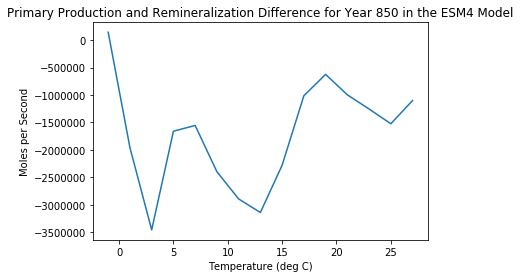

In [30]:
pp_remin_diff_in_theta = de.pp_remin_diff.isel(time=4,yh=range(0,576)).groupby_bins('thetao',theta_bins)
pp_remin_diff_sum = pp_remin_diff_in_theta.sum(xr.ALL_DIMS)

pp_remin_diff_sum.plot()

plt.title('Primary Production and Remineralization Difference for Year 850 in the ESM4 Model')
plt.xlabel('Temperature (deg C)')
plt.ylabel('Moles per Second')